Toan Bui
<br>
Kaylyn Han
<br>
Elise Wong A13026941

In [126]:
import csv
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Read in review data
f = csv.reader(gzip.open('reviews.csv.gz', 'rt'), delimiter = ',')

data = []
first = True
for line in f:
    if first:
        header = line
        first = False
    else:
        d = dict(zip(header, line))
        data.append(d)

review_df = pd.DataFrame(data)

# Re-order columns
review_df = review_df[['id', 'listing_id', 'reviewer_id', 'date', 'reviewer_name', 'comments']]

print(len(review_df))
review_df.head()

476183


,id,listing_id,reviewer_id,date,reviewer_name,comments
0,8,6,415,2008-06-22,Terrence,Sara is an awesome hostess. She was very cons...
1,4383,6,3762,2009-06-22,Christine,My stay at “Craftsmen” was wonderful! Sara wa...
2,1722383,6,1864778,2012-07-16,Hieu,This was my first time using Airbnb and Sara m...
3,5595071,6,117966,2013-07-07,Daryna,Sara was a very pleasant host! Reservation was...
4,5631156,6,6563815,2013-07-08,Mathew,Sara was such an amazing hostess! My girlfrien...


In [130]:
# Read in listing data

f = csv.reader(gzip.open('London/listings.csv.gz', 'rt'), delimiter = ',')

data = []
first = True
for line in f:
    if first:
        header = line
        first = False
    else:
        d = dict(zip(header, line))
        data.append(d)        
        
listing_df = pd.DataFrame(data)
list(listing_df.columns)

['access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [131]:
# Get subset of all columns
listing_df = listing_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'review_scores_rating',
                         'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 
                         'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
print(listing_df.shape)
listing_df.head()

(85273, 16)


,id,name,host_id,host_name,neighbourhood,review_scores_rating,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,Brixton,92,51.46225,-0.11732,Entire home/apt,$88.00,2,184,2019-07-10,1.59,2,344
1,13913,Holiday London DB Room Let-on going,54730,Alina,LB of Islington,96,51.56802,-0.11121,Private room,$65.00,1,16,2019-06-10,0.14,3,353
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Chelsea,96,51.48796,-0.16898,Entire home/apt,$100.00,30,87,2019-08-27,0.73,1,114
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,City of Westminster,94,51.52098,-0.14002,Entire home/apt,$300.00,3,41,2019-06-19,0.40,15,265
4,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,LB of Wandsworth,98,51.47298,-0.16376,Entire home/apt,$175.00,30,93,2019-06-08,0.86,1,346


In [132]:
listing_df['price'] = listing_df['price'].apply(lambda x: float(x.split('$')[1].replace(',', '')))


In [133]:
listing_df['number_of_reviews'] = listing_df['number_of_reviews'].apply(int)

In [141]:
# Get subset of listings that have reviews
listing_df = listing_df[listing_df['review_scores_rating'] != '']
print(listing_df.shape)
listing_df

(62589, 16)


,id,name,host_id,host_name,neighbourhood,review_scores_rating,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,Brixton,92,51.46225,-0.11732,Entire home/apt,88.0,2,184,2019-07-10,1.59,2,344
1,13913,Holiday London DB Room Let-on going,54730,Alina,LB of Islington,96,51.56802,-0.11121,Private room,65.0,1,16,2019-06-10,0.14,3,353
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Chelsea,96,51.48796,-0.16898,Entire home/apt,100.0,30,87,2019-08-27,0.73,1,114
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,City of Westminster,94,51.52098,-0.14002,Entire home/apt,300.0,3,41,2019-06-19,0.40,15,265
4,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,LB of Wandsworth,98,51.47298,-0.16376,Entire home/apt,175.0,30,93,2019-06-08,0.86,1,346
5,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,LB of Wandsworth,92,51.44687,-0.21874,Entire home/apt,65.0,90,31,2019-07-25,0.72,1,147
6,25123,Clean big Room in London (Room 1),103583,Grace,LB of Barnet,95,51.57224,-0.20906,Private room,29.0,10,122,2019-06-28,1.06,3,288
7,26223,FREE WIFI!! Angel Bright Ap Private Terrace by...,110865,Paulo,LB of Islington,85,51.54168,-0.10207,Entire home/apt,147.0,3,63,2019-07-22,0.58,3,339
8,31361,"Restful Room, Friendly House, East London",134606,Cryn,LB of Newham,97,51.53484,0.02707,Private room,34.0,1,115,2019-06-30,1.03,2,336
9,33332,Twickenham Stadium & Wimbledon easy reach Ensuite,144444,Chi-Chi,LB of Hounslow,88,51.46507,-0.32421,Private room,100.0,1,5,2019-05-26,0.05,1,365


<b> 1. Identify a dataset to study, and perform an exploratory analysis of the data. Describe the dataset,
including its basic statistics and properties, and report any interesting findings. This exploratory analysis
should motivate the design of your model in the following sections. Datasets should be reasonably large
(e.g. more than 50,000 samples).

In [135]:
# What is the average price in each neighborhood?

# average price for room_type?

In [142]:
listing_df['review_scores_rating'].describe()

count     62589
unique       61
top         100
freq      17905
Name: review_scores_rating, dtype: object

In [145]:
ratings = listing_df['review_scores_rating'].value_counts()
dist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
uniqueratings = ratings.index.tolist()
valratings = ratings.tolist()
# loop through unique ratings
for j in ratings.iteritems():
    ind = math.floor(int(j[0])/10)
    dist[ind-1] = dist[ind-1] + j[1]
    
print(dist)


[0, 295, 11, 251, 173, 1195, 1862, 10939, 29958, 17905]


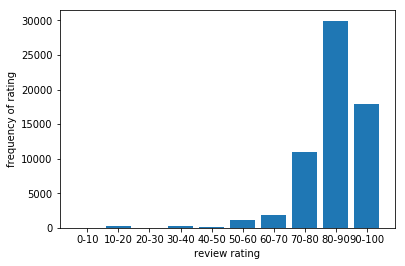

In [148]:
plt.bar(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'], dist)
plt.xlabel('review rating')
plt.ylabel('frequency of rating')
plt.show()

In [163]:
neighbourhoods = listing_df['neighbourhood'].value_counts()
means = []
for i in neighbourhoods.index.tolist():
    listings = listing_df[listing_df['neighbourhood'] == i]
    neighmean = listings['price'].mean()
    means.append(neighmean)

In [169]:
c = 0
neigh = []
for j in neighbourhoods.index.tolist():
    neigh.append(neighbourhoods[j])
    c = c + neighbourhoods[j]
    if (c > 50000): break
        
print(len(neigh))
print(neighbourhoods[:49])

49
City of Westminster             4045
LB of Tower Hamlets             3456
LB of Hackney                   2804
LB of Islington                 2797
LB of Camden                    2442
LB of Southwark                 1972
LB of Lambeth                   1911
LB of Brent                     1849
LB of Wandsworth                1806
RB of Kensington and Chelsea    1789
LB of Haringey                  1573
LB of Hammersmith & Fulham      1512
LB of Newham                    1254
LB of Barnet                    1065
LB of Waltham Forest             992
RB of Greenwich                  982
LB of Lewisham                   938
LB of Ealing                     928
Hammersmith                      814
Shoreditch                       808
LB of Richmond upon Thames       770
LB of Croydon                    758
Kensington                       752
LB of Merton                     716
Hampstead                        682
LB of Hounslow                   661
Whitechapel/Brick Lane           63

In [162]:
neighdict = dict(zip(neighbourhoods.index, means))
neigh = pd.Series(neighdict).sort_values(ascending = False)
neigh.head()

Mayfair          528.418919
Parsons Green    359.229167
Westminster      355.860294
Clerkenwell      317.495890
Knightsbridge    310.403974
dtype: float64

In [151]:
listing_df['price'].describe()

count    62589.000000
mean       117.468357
std        426.908670
min          0.000000
25%         45.000000
50%         80.000000
75%        130.000000
max      20000.000000
Name: price, dtype: float64

In [161]:
roommean = []
for j in listing_df['room_type'].unique():
    rooms = listing_df[listing_df['room_type'] == j]
    roommean.append(rooms['price'].mean())

roomprices = dict(zip(listing_df['room_type'].unique(), roommean))
pd.Series(roomprices).sort_values(ascending = False)

Hotel room         180.670042
Entire home/apt    163.616569
Private room        52.011429
Shared room         37.664894
dtype: float64

<b> 2. Identify a predictive task that can be studied on this dataset. Describe how you will evaluate your
model at this predictive task, what relevant baselines can be used for comparison, and how you will assess
the validity of your model’s predictions. It’s fine to use models that were described in class here (i.e.,
you don’t have to invent anything new (though you may!)), though you should explain and justify which
model was appropriate for the task. It’s also important in this section to carefully describe what features
you will use and how you had to process the data to obtain them.

In [ ]:
# Try to predict the review rating based on reviews, price, room type, number of reviews, reviews per month, neighbourhood